# Classification Using Convolutional Neural Network

In [47]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from keras.datasets import cifar10
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import confusion_matrix
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.models import Sequential, load_model
from keras.callbacks import EarlyStopping
from tensorflow.keras.applications import VGG16

In [48]:
(X_train, y_train), (X_test,y_test) = cifar10.load_data()
X_train.shape

(50000, 32, 32, 3)

In [49]:
X_test.shape

(10000, 32, 32, 3)

In [50]:
y_train.shape

(50000, 1)

In [51]:
labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

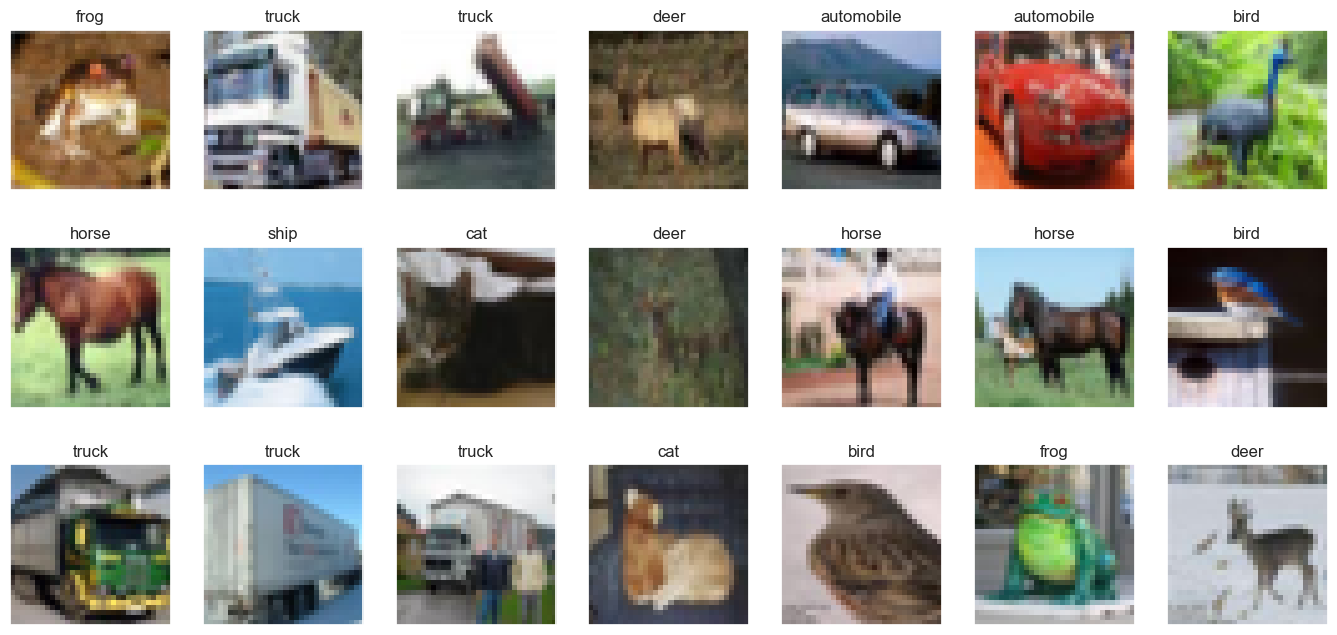

In [52]:
# Display the first 21 images of X_train
fig, axes = plt.subplots(ncols=7, nrows=3, figsize=(17, 8))
index = 0
for i in range(3):
    for j in range(7):
        axes[i,j].set_title(labels[y_train[index][0]])
        axes[i,j].imshow(X_train[index])
        axes[i,j].get_xaxis().set_visible(False)
        axes[i,j].get_yaxis().set_visible(False)
        index += 1
plt.show()

In [53]:
# Convert both X_train and X_test to grayscale
X_train = np.array([cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) for image in X_train])
X_test = np.array([cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) for image in X_test])

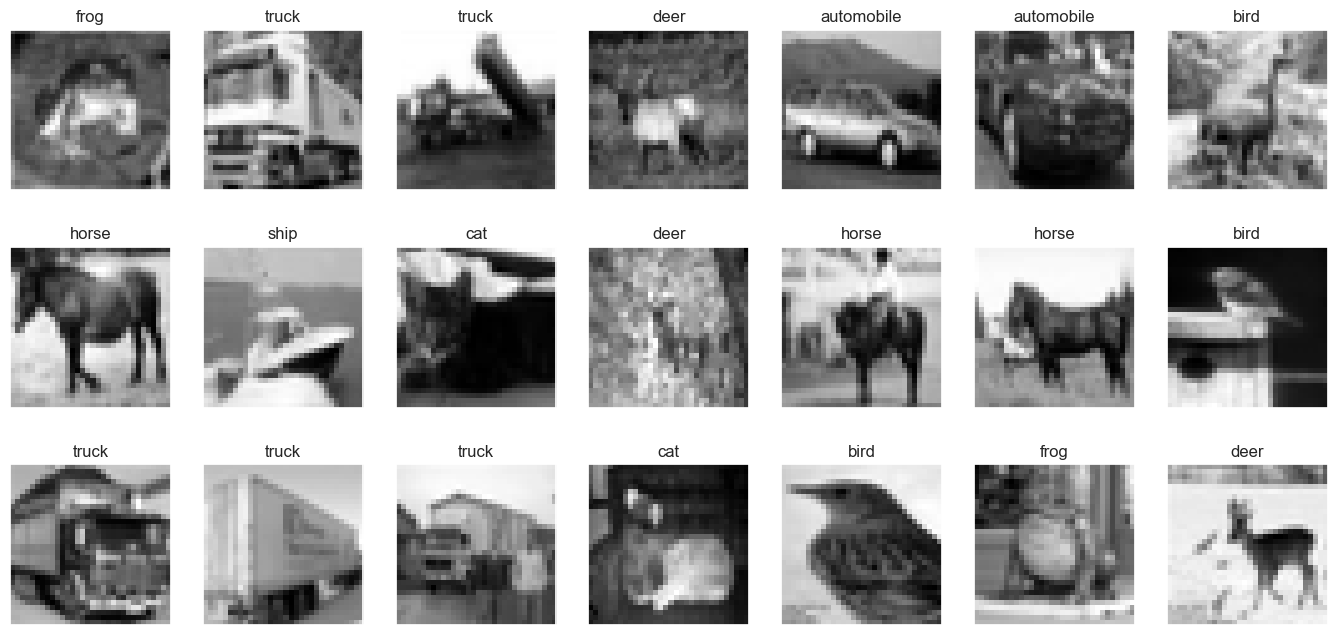

In [54]:
# Display the first 21 images of X_train (grayscale)
fig, axes = plt.subplots(ncols=7, nrows=3, figsize=(17, 8))
index = 0
for i in range(3):
    for j in range(7):
        axes[i,j].set_title(labels[y_train[index][0]])
        axes[i,j].imshow(X_train[index], cmap='gray')
        axes[i,j].get_xaxis().set_visible(False)
        axes[i,j].get_yaxis().set_visible(False)
        index += 1
plt.show()

# Normalizing the data

In [55]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [56]:
# Label preprocessing
one_hot_encoder = OneHotEncoder(sparse=False)

In [57]:
one_hot_encoder.fit(y_train)

C:\Users\aminu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


OneHotEncoder(sparse=False, sparse_output=False)

In [58]:
y_train = one_hot_encoder.transform(y_train)
y_test = one_hot_encoder.transform(y_test)

In [59]:
# Load the pre-trained VGG16 model without the fully connected layers
vgg16_model = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

# Convert the grayscale input to RGB by replicating the single channel
model = Sequential()
model.add(Conv2D(3, (1, 1), input_shape=(32, 32, 1)))
model.add(vgg16_model)  # Add the modified VGG16 model
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['acc'])

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=3)

In [ ]:
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test), callbacks=[es])

Epoch 1/20
1563/1563 [==============================] - 2339s 1s/step - loss: 2.3058 - acc: 0.1000 - val_loss: 2.3027 - val_acc: 0.1000
Epoch 2/20
 484/1563 [========>.....................] - ETA: 28:09 - loss: 2.3027 - acc: 0.1030